# KMeans Clustering on defenders only

## - Objectives - 
### 1 - defensive feature clustering 

#### 1.1 - Use an elbow plot to choose optimal k value.

#### 1.2 - Observe clusters over PCA graph to look for outliers. 
#### 1.3 - Observe clusters over key scaled features. 

### 2 - Offensive feature clustering. 

#### 2.1 - Use an elbow plot to choose optimal k value. 

#### 2.2 - Observe clusters over PCA graph to look for outliers. 
#### 2.3 - Observe clusters over key scaled features. 

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [32]:
# loading data 

df = pd.read_csv('../data/final_per_90_and_pAdj.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 110 entries, fb_id to attacking_touches
dtypes: float64(101), int64(1), object(8)
memory usage: 606.0+ KB


In [33]:
# pulling out defensive features for clustering 
def_stats = df.loc[(df['Nineties']>5)&(df['Position']=='DF')][[ 'Nineties','pAdj_Total_tackles', 'pAdj_Tackles_Won','Aerial_win_pct',

       'pAdj_Num_Dribblers_tackled', 'pAdj_Num_Dribbled_past','pAdj_Blocks',
       'pAdj_Interceptions', 'pAdj_Clearences',
       'pAdj_Fouls', 'pAdj_def_interceptions',
       'pAdj_Recoveries', 'pAdj_Aerial_Duels_lost',
       'True_tackle_pct', 'pAdj_Tackle_int_blocks']]

In [34]:
def_df = df.loc[(df['Nineties']>5)&(df['Position']=='DF')]

## 1 Defensive feature clustering

### 1.1 Use elbow plot to choose k value of 4 

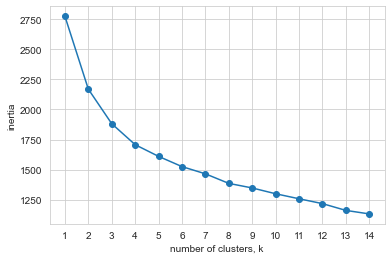

In [35]:
# Create scaler: scaler
scaler = StandardScaler()

scaler.fit(def_stats)
scaled_stats= scaler.transform(def_stats)


ks = range(1, 15)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(scaled_stats)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### 1.2 Observe clusters over PCA components  

interita : 1706.993222314895


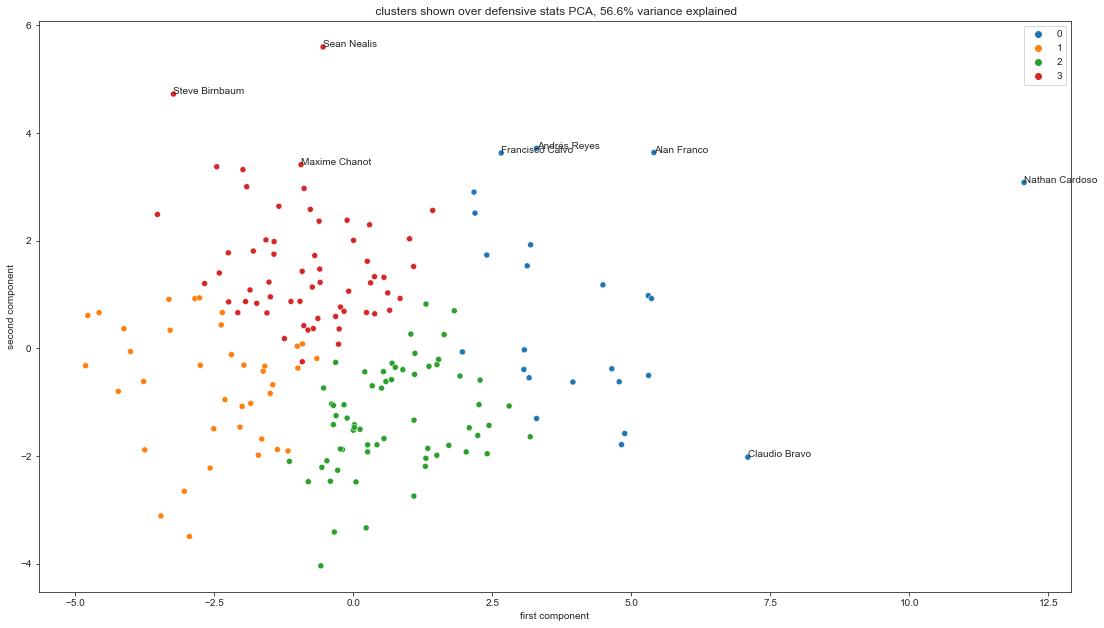

In [36]:
# Create scaler: scaler
scaler = StandardScaler()
# Create KMeans instance: kmeans

kmeans = KMeans(n_clusters=4)


model = kmeans.fit(scaled_stats)
print('interita :',model.inertia_)
labels = model.predict(scaled_stats)

def_pca = PCA().fit(scaled_stats)
def_pca_x = def_pca.transform(scaled_stats)
def_pca_df = pd.DataFrame(def_pca_x[:,:2])
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
data = def_pca_x[:,0:2]
x = def_pca_x[:, 0]
y = def_pca_x[:, 1]

c = labels


pc_var = 100 * def_pca.explained_variance_ratio_.cumsum()[1]
sns.set_style("whitegrid")
g = sns.scatterplot(data=def_pca_df, x =x, y=y,hue=c,
#                     cmap="plasma",
                    palette=["C0", "C1", "C2","C3",
#                              "k"
                            ], 
                    ax=ax).set(title=f' clusters shown over defensive stats PCA, {pc_var:.1f}% variance explained',
                              xlabel='first component',ylabel='second component')


p= df.loc[(df['Nineties']>5)&(df['Position']=='DF')]['player_name']
for p, x, y in zip(p, x, y):
    if x >6:
        plt.annotate(p, (x, y))
    elif y> 3.4:
        plt.annotate(p, (x,y))
  
        

plt.show()


## Observation - Most defenders are in cluster 1 and 3 which we see at the top and right side of the graph. players whos features show the most variance between the two PCA are labeled above. 

In [37]:
defs = df.loc[(df['Nineties']>5)&(df['Position']=='DF')]

dfc = pd.DataFrame({'cluster_label':labels,'name':defs['player_name'],
                    'Position':defs['Position'],
                   'PCA_first_component':def_pca_x[:, 0],
                   'PCA_second_component':def_pca_x[:,1],'Ninties':defs['Nineties']})
dfc['cluster_label'].value_counts()

2    63
3    60
1    38
0    24
Name: cluster_label, dtype: int64

## 1.2 - Observe clusters over key defensive features.

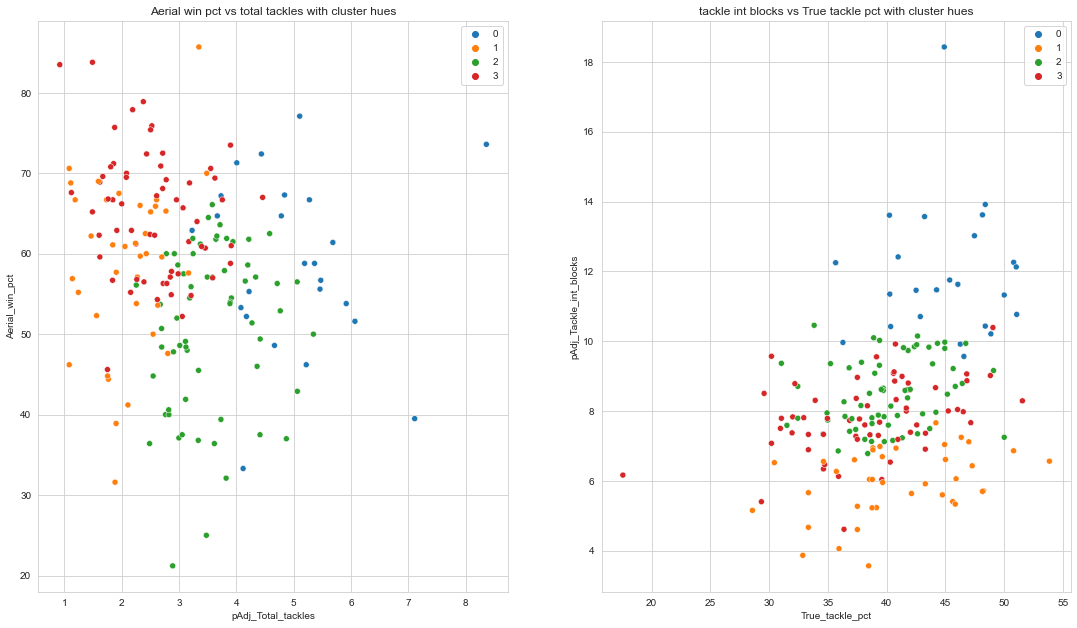

In [38]:

xs = def_stats.iloc[:,1]
ys = def_stats.iloc[:,3]

# # Make a scatter plot of xs and ys, using labels to define the colors

fig, (ax1, ax2) = plt.subplots(1, 2)
sns.set_style("whitegrid")
fig.set_size_inches(18.5, 10.5)
g = sns.scatterplot(data=def_stats, x=xs,y =ys,hue=labels,palette=["C0", "C1", "C2","C3"],
               ax=ax1 ).set(title='Aerial win pct vs total tackles with cluster hues',
                            xlabel='pAdj_Total_tackles',
                           ylabel='Aerial_win_pct')

b = sns.scatterplot(data=scaled_stats, x=def_stats.iloc[:,-2],y =def_stats.iloc[:,-1],hue=labels,palette=["C0", "C1", "C2","C3"],
               ax=ax2 ).set(title='Tackle int blocks vs True tackle pct with cluster hues',
                            xlabel='True_tackle_pct',ylabel='pAdj_Tackle_int_blocks')


plt.show()

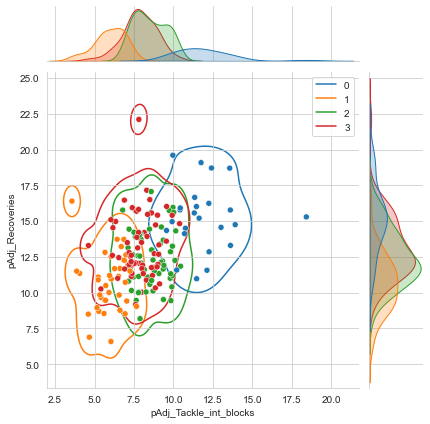

<Figure size 432x288 with 0 Axes>

In [40]:


sns.set_style("whitegrid")
g = sns.jointplot(x=def_stats.iloc[:,-1] ,
            y=def_stats.iloc[:,-4],
            data=def_stats,
#             xlim=(0.1, 1.0), 
                  palette=["C0", "C1", "C2","C3",
#                            "k"
                          ] ,
                  hue=labels,
#                   alpha=0.4,
                  
                 )
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=2)
# g.plot(sns.kdeplot, sns.histplot)



plt.show()
plt.clf()

## 2 - KMeans for attacking features



In [41]:
# select attacking features

att_stats = def_df[['Nineties', 'xA',
       'Key_pass', 'Comp_prog', 
        'Total_Prg_Dist', 'Short_Cmp', 'Short_Att',
       'Short_Cmp_pct', 'Medium_Cmp', 'Medium_Att', 'Medium_Cmp_pct',
       'Long_Cmp', 'Long_Att', 'Long_Cmp_pct', 'touches',
       'touches_mid_3rd',
       'touches_att_3rd', 'touches_att_box', 'dribble_Succ',
       'dribble_Att', 'dribble_Succ_pct', 'num_dribble_past',
       'dribble_megs','carries', 'carries_prog_dist',
       'carries_prog', 'carries_att_3rd', 'carries_att_box',
       'miss_control', 'dispossed', 'recep_targ', 'recep_succ',
       'recept_pct', 'Fouls_drawn', 'Offsides', 'Crosses', 
        'PK_won','Aerial_win_pct', 'Gls','Sh','SoT', 'SoT%',
       'G/Sh', 'G/SoT', 'xG', 'npxG',
       'npxG/Sh', 'np:G-xG', 'avg_shrt+med_pass_pct',
       'pct_long_balls', 'prog_carry+lng_comp+crosses',
       'attacking_touches'
                                     ]]

### 2.1 Use elbow plot to choose k value of 4 clusters.

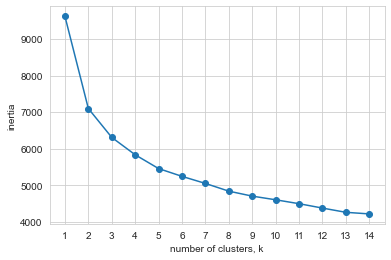

In [42]:
scaler = StandardScaler()
scaler.fit(att_stats)
att_scaled_stats= scaler.transform(att_stats)

ks = range(1, 15)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(att_scaled_stats)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## 2.2 Observe clusters over PCA components to view players with most variance from cluster

interita : 5835.6917800139


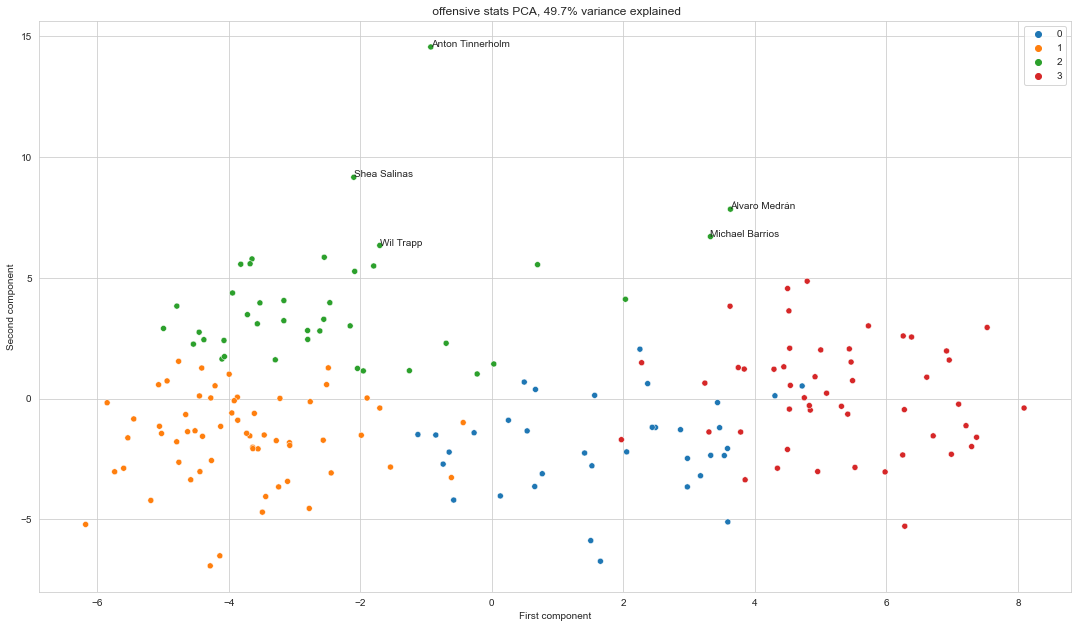

In [62]:
# Create KMeans instance: kmeans

kmeans = KMeans(n_clusters=4)


model = kmeans.fit(att_scaled_stats)
print('interita :',model.inertia_)
att_labels = model.predict(att_scaled_stats)

att_pca = PCA().fit(att_scaled_stats)
att_pca_x = att_pca.transform(att_scaled_stats)
att_pca_df = pd.DataFrame(att_pca_x[:,:2])
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
data = att_pca_x[:,0:2]
x = att_pca_x[:, 0]
y = att_pca_x[:, 1]

c = att_labels


pc_var = 100 * att_pca.explained_variance_ratio_.cumsum()[1]
g = sns.scatterplot(data=att_pca_x[:,0:2], x =att_pca_x[:, 0], y=att_pca_x[:, 1],
                    hue=c,palette=["C0", "C1", "C2","C3", 
#                                    "k"
                                  ],
                    ax=ax)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f' offensive stats PCA, {pc_var:.1f}% variance explained')
p=df.loc[df['Nineties']>1]['player_name']
for p, x, y in zip(p, x, y):
    if y>6:
        plt.annotate(p, (x,y))
        
plt.show()

## pca scatter of first two components show players with the largest variance of features in relationt to their cluster at edges of graph and are labeled above.



In [63]:
dfc = pd.DataFrame({'cluster_label':att_labels,'name':def_df['player_name'],
                    'Position':def_df['Position'],
                   'PCA_first_component':att_pca_x[:, 0],
                   'PCA_second_component':att_pca_x[:,1],'Ninties':def_df['Nineties']})
dfc['cluster_label'].value_counts()

1    60
3    50
2    40
0    35
Name: cluster_label, dtype: int64

## 2.2 - Observe clusters over key offensive features.

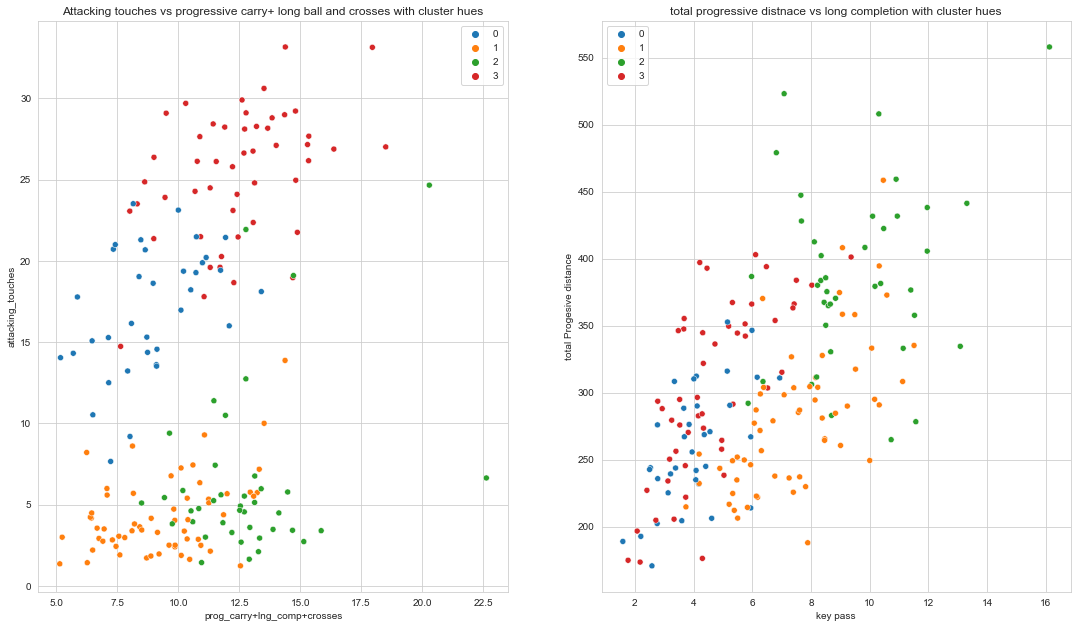

In [64]:


# # Make a scatter plot of xs and ys, using labels to define the colors

fig, (ax1, ax2) = plt.subplots(1, 2)
sns.set_style("whitegrid")
fig.set_size_inches(18.5, 10.5)
g = sns.scatterplot(data=att_stats, x='prog_carry+lng_comp+crosses',
                    y ='attacking_touches',
                    hue=att_labels, 
                    palette=["C0", "C1", "C2","C3"],
               ax=ax1 ).set(title='Attacking touches vs progressive carry+ long ball and crosses with cluster hues',
                            xlabel='prog_carry+lng_comp+crosses',
                           ylabel='attacking_touches')


b = sns.scatterplot(data=att_stats, x='Long_Cmp',y ='Total_Prg_Dist' ,hue=att_labels,
                    palette=["C0", "C1", "C2","C3"],
               ax=ax2 ).set(title='total progressive distnace vs long completion with cluster hues',
                            xlabel='key pass',ylabel='total Progesive distance')



plt.show()